# Portfolio Optimization

Haiyang Yu, 04/13/2018

Contents:
+ Foundamental concepts
+ Markowitz Modern Portfolio Theory


## Foundamental concepts

- **Rate of Return**
    - In finance, return is a profit on an investment. Rate of return is a profit on an investment over a period of time, expressed as a proportion of the original investment. The time period is typically a year, in which case the rate of return is referred to as annual return. To compare returns over time periods of different lengths on an equal basis, it is useful to convert each return into an annualised return. This conversion process is called **annualisation**.

    $$ r_t = \frac{S_t - S_{t-1}}{S_{t-1}} $$
    
    - Annualisation:
        + Without any reinvestment, a return $R$ over a period of length $t$ (unit: year) is equivalent to a rate of annual return: $r=R/t$
        + If the reinvestment is considerred, due to the effect of compounding, the relationship between a rate of return $r$, and a return $R$ over a length of time $t$ is: $(1+R) = (1+r)^t$

    - log-return: 
        + logarithmic return from initial value ($V_i$) to the future value ($V_f$): $\ln(V_f/V_i)$
        + logarithmic rate of return: $r_{log} = \ln(V_f/V_i)/t$
        + Asset growth equation: $V_f = V_i e^{rt}$

    - Internal Rate of Return (IRR): 
        + The rate of return which makes the net present value (NPV) of cash flows zero. 
        + It is a solution $r$ satisfying the following equation:
            $$ NPV = \sum_{t=0}^{n} \frac{C_t}{(1+r)^t} $$
        + Example: An investment is given by the sequence of cash flows, IRR should be 5.96%. 
            
Year (t)  |  Cash flow ($C_t$)
----------|-------------------
0 |  -123400
1 |  36200
2 |  54800
3 |  48100


- **Risk**
    + The Golden Law of finance: high returns are often associated with high risks.
    + Risks are the uncertainties of returns, like the error bars of measurements.
    + Volatility:
        - In finance, volatility (symbol σ) is the degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns.
        - Historic volatility is derived from time series of past market prices. An implied volatility is derived from the market price of a market traded derivative (in particular an option).
        - For a financial instrument whose price follows a Gaussian random walk, or Wiener process, the width of the distribution increases as time increases. This is because there is an increasing probability that the instrument's price will be farther away from the initial price as time increases. However, rather than increase linearly, the volatility increases with the square-root of time as time increases, because some fluctuations are expected to cancel each other out, so the most likely deviation after twice the time will not be twice the distance from zero.
        - Since observed price changes do not follow Gaussian distributions, others such as the Lévy distribution are often used. These can capture attributes such as "fat tails". Volatility is a statistical measure of dispersion around the average of any random variable such as market parameters etc.
        - Much research has been devoted to modeling and forecasting the volatility of financial returns, and yet few theoretical models explain how volatility comes to exist in the first place.
        - Volatility is not always the bad thing; sometimes it can bring profits (e.g. trading volatility).

- **Risk Free Rate**
    + Theoretical rate of return of an investment with zero risk over a given period of time.
    + e.g. risk-free bonds, issued by government of agency whose risks of default are so low as to be negligible.
    + e.g. United States Treasury security: https://en.wikipedia.org/wiki/United_States_Treasury_security#Treasury_bond
    + https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

- **Arbitrage**
    + In economics and finance, arbitrage is the practice of taking advantage of a price difference between two or more markets: striking a combination of matching deals that capitalize upon the imbalance, the profit being the difference between the market prices. 
    + Arbitrage-free: If the market prices do not allow for profitable arbitrage, the prices are said to constitute an arbitrage equilibrium, or arbitrage-free market. An arbitrage equilibrium is a precondition for a general economic equilibrium. The "no arbitrage" assumption is used in quantitative finance to calculate a unique risk neutral price for derivatives.
    
- **Efficient-market hypothesis**
    + Asset prices fully reflect all available information. 
    + A direct implication is that it is impossible to "beat the market" consistently on a risk-adjusted basis since market prices should only react to new information.
    + Efficient-market is also an arbitrage-free market.


without reinvestment: r = 0.5
with reinvestment: r = 0.19623119885131546


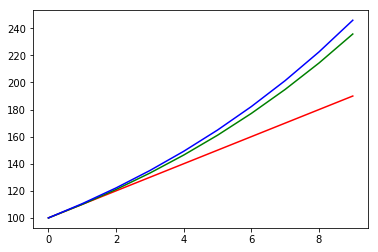

In [4]:
import numpy as np

t = 10
R = 5.0
print('without reinvestment: r =', R/t )
print('with reinvestment: r =', (1+R)**(1.0/t)-1 )

PV = 100.0
r  = 0.10  # annual return
nt = 10    # years
t = np.arange(10)
FV1 = PV * (1+r*t)
k = 1 
FV2 = PV * (1+r/k)**(k*t)
k = 365000
FV3 = PV * (1+r/k)**(k*t)
plt.plot(t, FV1, 'r')
plt.plot(t, FV2, 'g')
plt.plot(t, FV3, 'b')


0.10517091807564771


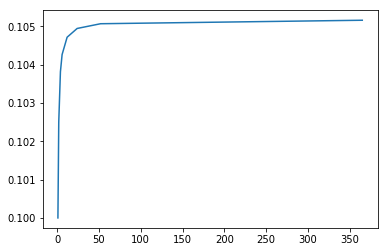

In [42]:
# relationship of R v.s. k
ks = np.array([1,2,4,6,12,24,52,365])
r = 0.1
plt.plot(ks, (1+r/ks)**(ks)-1)
print(np.exp(r)-1)

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

def add_logreturn(quote, n=[0, 1], ):
    # n --- 0: in-day logreturn (Close/Open); 
    #       1: 1-day logreturn (Adj Close); 
    #       k: k-day logreturn (Adj Close)
    ntime = len(quote)
    logadj = np.array( np.log( quote.loc[:,'Adj Close'].astype('float') ))
    for i in n:
        quote.loc[:,'logreturn_'+format(i)] = np.zeros([ntime]) + np.nan
        if i==0:
            quote.loc[:,'logreturn_0'] = np.log(quote.loc[:, 'Close'].astype('float'))  - \
                np.log(quote.loc[:, 'Open'].astype('float')) 
        else:
            #quote['logreturn_'+format(i)].values[i:ntime] = logadj[i:ntime] - logadj[0:ntime-i]
            quote.loc[quote.index[i:ntime], 'logreturn_'+format(i)] = logadj[i:ntime] - logadj[0:ntime-i]
    return quote

In [44]:
# Internal Rate of Return
import numpy as np
np.irr([-123400, 36200, 54800, 48100])

0.0596163785673296

$X(t) = X(t-1) + Z(t)$, where $Z(t)$ ~ any distribuion with $E(Z)=0, Var(Z)=\sigma^2$

$E(\bar{Z}) = \overline{E(Z)} = 0$

$Var(\bar{Z}) = E(\bar{Z}^2) - E^2(\bar{Z}) = \sigma^2/t$

$\bar{Z}$ ~ $N(0, \sigma^2/t)$

$X(t) = t \bar{Z}$

$X(t)$ ~ $N(0, \sigma^2 t)$

$std(X(t)) = \sigma \sqrt{t}$


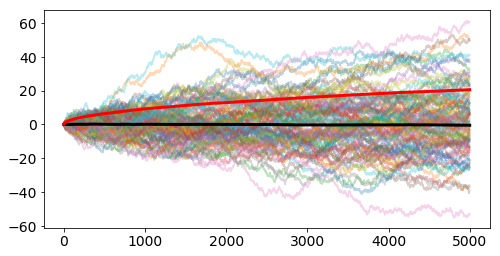

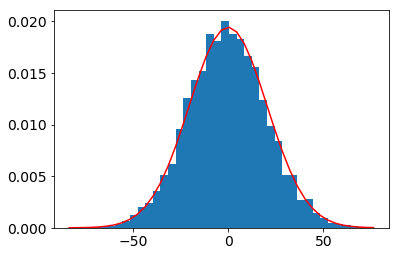

In [45]:
# Volatilities in Gaussian random walk (Wiener process)
# Moving-Average model: 
# x(t) = x(t-1) + z(t), where z(t) ~ N(0, sigma^2)
# z(0) = 0
# MZ(t) = sum(z(i), i=0,1,2,...,t)/t
# E(MZ(t)) = sum(E(z(i)))/t = 0
# MZ(t) ~ Norm(0, sigma^2  1/t)  # CLT
# X(t) = t*MZ(t) ~ Norm(0, sigma^2 = t^2/t) 
#      = Norm(0, sigma^2 = t) # 

ntime = 5000; nexp = 5000
#data = np.cumsum( stats.norm.rvs(size= \
#             ntime*nexp).reshape([nexp, ntime]), axis=1 )
data = np.cumsum( stats.uniform.rvs(loc=-0.5, scale=1, size= \
             ntime*nexp).reshape([nexp, ntime]), axis=1 )

dmean = np.mean(data, axis=0)
dstd  = np.std(data, axis=0)

plt.figure(1, figsize=(8, 4))
for i in range(100):
    plt.plot(data[i,:], alpha=0.3)
plt.plot(dmean,'k', linewidth=3)
plt.plot(dstd,'r', linewidth=3)
plt.show()

plt.figure(2)
dpdf = plt.hist(data[:, -1], 40, density=True)
plt.plot(dpdf[1], stats.norm.pdf(dpdf[1], 
                 loc=0, scale=np.std(data[:,-1])), 'r')

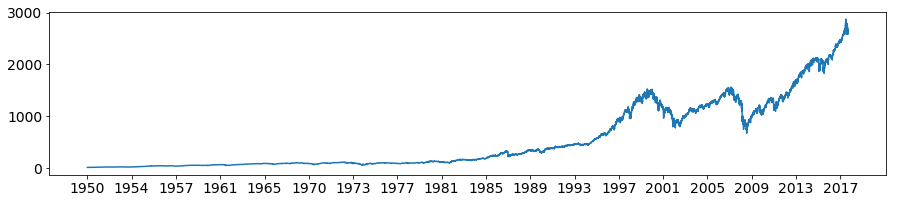

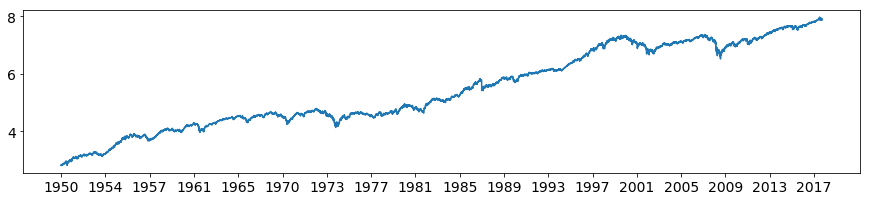

In [46]:
# Volatility
sp = pd.read_csv('sp500.csv')
ntime = len(sp)

plt.figure(1, figsize=(15,3))
plt.plot( sp['Adj Close'] )
plt.xticks(range(ntime)[::1000], [s[:4] for s in sp['Date'][::1000]] )
plt.show()

plt.figure(1, figsize=(15,3))
plt.plot( np.log(sp['Adj Close']) )
plt.xticks(range(ntime)[::1000], [s[:4] for s in sp['Date'][::1000]] )
plt.show()

In [47]:
sp.index = pd.to_datetime( sp['Date'] )
sp = add_logreturn(sp)
sp.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,logreturn_0,logreturn_1
Date,,,,,,,,,
1950-01-03,1950-01-03,16.66,16.66,16.66,16.66,16.66,1260000,0.000000,NaN
1950-01-04,1950-01-04,16.85,16.85,16.85,16.85,16.85,1890000,0.000000,0.011340
1950-01-05,1950-01-05,16.93,16.93,16.93,16.93,16.93,2550000,0.000000,0.004737
1950-01-06,1950-01-06,16.98,16.98,16.98,16.98,16.98,2010000,0.000000,0.002949
1950-01-09,1950-01-09,17.09,17.09,17.08,17.08,17.08,3850000,-0.000585,0.005872


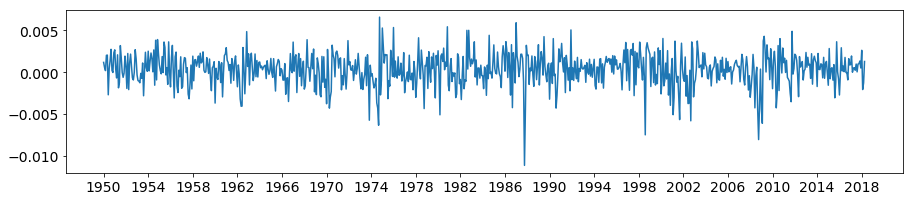

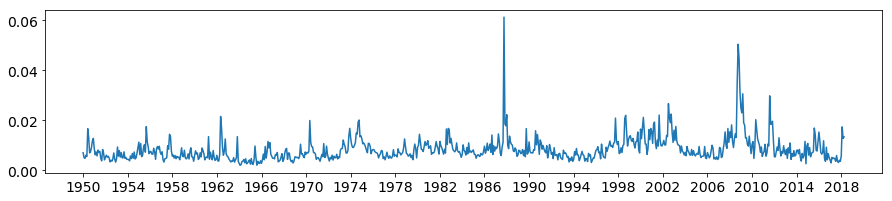

In [48]:
spm = sp.resample('M').mean()[['logreturn_1']]
spm['volatility'] = sp.resample('M').std()[['logreturn_1']]
spm['logvolatility'] = np.log(spm['volatility'])
nmonth = len(spm)

plt.figure(1, figsize=(15,3))
plt.plot(range(nmonth), spm['logreturn_1'] )
plt.xticks(range(nmonth)[::48], [s.year for s in spm.index[::48]] )
plt.show()

plt.figure(2, figsize=(15,3))
plt.plot(range(nmonth), spm['volatility'] )
plt.xticks(range(nmonth)[::48], [s.year for s in spm.index[::48]] )
plt.show()

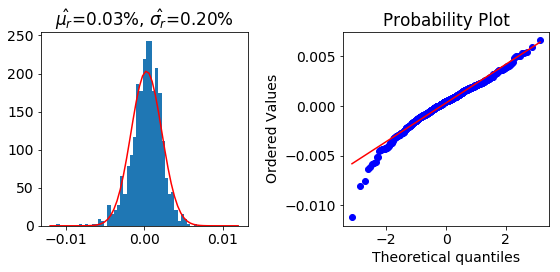

In [49]:
bins = np.linspace(-0.012, 0.012, 60)
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1)
pdf = plt.hist(spm['logreturn_1'], bins=bins, density=True)
plt.plot(bins, stats.norm.pdf(bins, loc=np.mean(spm['logreturn_1']), 
                              scale=np.std(spm['logreturn_1'])), 'r')
plt.title('$\hat{\mu_r}$='+format(np.mean(spm['logreturn_1'])*100,'.2f')+ \
         '%, $\hat{\sigma_r}$='+format(np.std(spm['logreturn_1'])*100, '.2f')+'%' )

tmp = stats.probplot(spm['logreturn_1'], plot=plt.subplot(1,2,2))
plt.tight_layout()


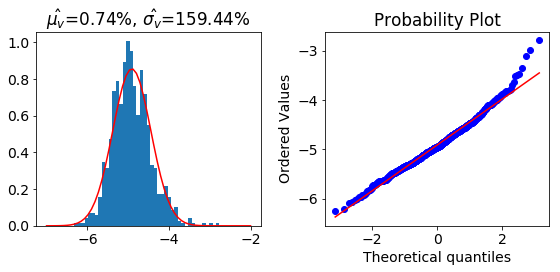

In [50]:
bins = np.linspace(-7, -2, 60)
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1)
var = 'logvolatility'
pdf = plt.hist(spm[var], bins=bins, density=True)
plt.plot(bins, stats.norm.pdf(bins, loc=np.mean(spm[var]), 
                              scale=np.std(spm[var])), 'r')
plt.title('$\hat{\mu_v}$=' + format(np.exp(np.mean(spm[var]))*100,'.2f')+ \
         '%, $\hat{\sigma_v}$='+format(np.exp(np.std(spm[var]))*100, '.2f')+'%' )

tmp = stats.probplot(spm[var], plot=plt.subplot(1,2,2))
plt.tight_layout()


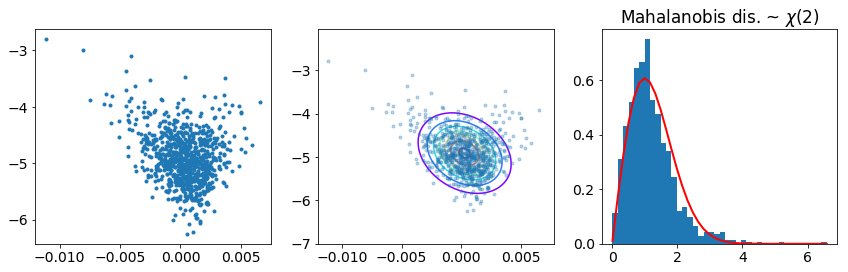

In [51]:
plt.figure(1, figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(spm['logreturn_1'], spm['logvolatility'], '.')

plt.subplot(1,3,2)
xx, yy = np.mgrid[-0.012:0.008:0.0002, -7:-2:0.05]
pos = np.dstack((xx,yy))
spm2 = spm[['logreturn_1', 'logvolatility']]
mu = spm2.mean(axis=0)
cov = np.dot((spm2 - mu).T, spm2 - mu)/len(spm)
z = stats.multivariate_normal.pdf(pos, mean=mu, cov=cov)
plt.contour(xx, yy, z, 8, cmap='rainbow')
plt.plot(spm['logreturn_1'], spm['logvolatility'], '.', alpha=0.3)

plt.subplot(1,3,3)
dis = np.sqrt( np.sum(np.dot((spm2-mu), np.linalg.inv(cov)) * (spm2-mu), axis=1) )
dpdf = plt.hist(dis, 40, density=True)
plt.plot(dpdf[1], stats.chi.pdf(dpdf[1], df=2), 'r', lw=2)
plt.title('Mahalanobis dis. ~ $\chi(2)$')

plt.tight_layout()

/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


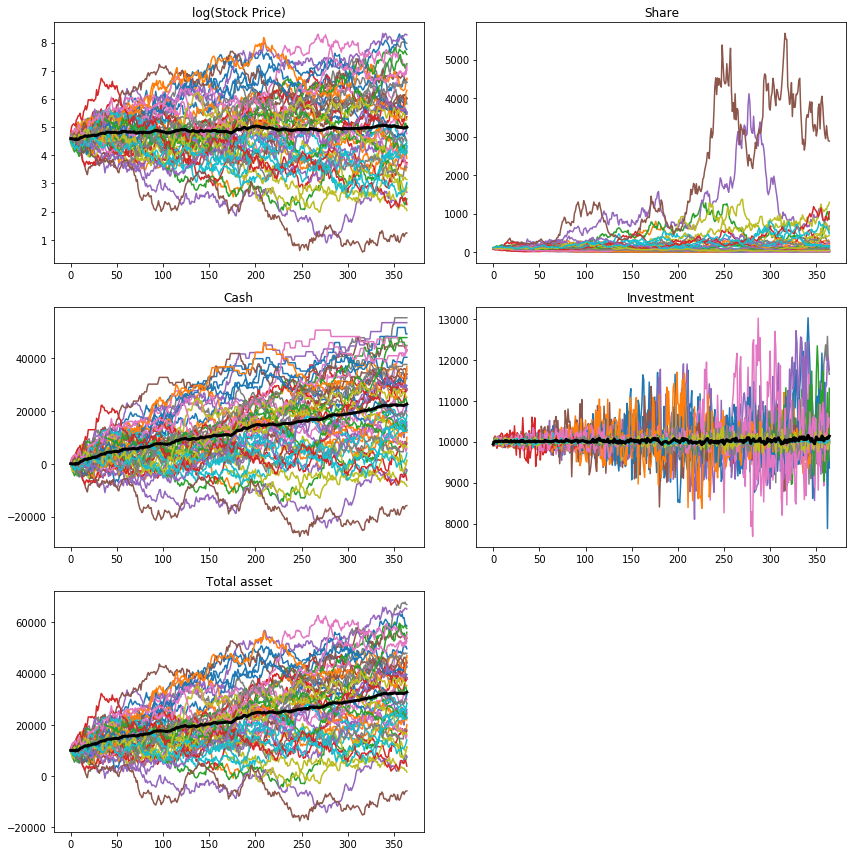

In [8]:
# A simple trading model on volatility
def simpletrade(ts, cash):
    share = np.zeros([len(ts)]).astype(int)
    asset = np.zeros([len(ts), 2])  # 0: cash, 1: investment
    share[0] = int(cash/ts[0])
    asset[0,1] = share[0]*ts[0]
    asset[0,0] = cash - asset[0,1]
    maintain = cash
    for i in range(1,len(ts)):
        if ts[i] > ts[i-1]:
            nsell = int(abs(ts[i]*share[i-1] - maintain)/ts[i])
            share[i] = share[i-1] - nsell
            asset[i,0] = asset[i-1,0] + nsell*ts[i]
        else:
            nbuy = int(abs(ts[i]*share[i-1] - maintain)/ts[i])
            share[i] = share[i-1] + nbuy
            asset[i,0] = asset[i-1,0] - nbuy*ts[i]
        asset[i,1] = share[i]*ts[i]
    return share, asset

ntime = 365; nexp = 50; s0 = np.log(100.0); mu = 0; vola = 0.1
cash = 1e4

ss = np.exp( s0 + np.cumsum(stats.norm.rvs(loc=0, scale=vola, 
        size=ntime*nexp).reshape([nexp, ntime]), axis=1) )
assetmean = np.zeros([ntime, 2])

plt.figure(1, figsize=(12, 12))
for i in range(nexp):
    plt.subplot(3,2,1)
    plt.plot(np.log(ss[i,:]) )
    plt.title('log(Stock Price)')
    
    share, asset = simpletrade(ss[i,:], cash=cash)
    assetmean += asset
    plt.subplot(3,2,2)
    plt.plot( share )
    plt.title('Share')

    plt.subplot(3,2,3)
    plt.plot( asset[:, 0] )
    plt.title('Cash')

    plt.subplot(3,2,4)
    plt.plot( asset[:, 1] )
    plt.title('Investment')

    plt.subplot(3,2,5)
    plt.plot( np.sum(asset, axis=1) )
    plt.title('Total asset')

plt.subplot(3,2,1)
plt.plot( np.mean(np.log(ss), axis=0), 'k', linewidth=3 )

plt.subplot(3,2,3)
plt.plot( assetmean[:, 0]/nexp, 'k', linewidth=3 )

plt.subplot(3,2,4)
plt.plot( assetmean[:, 1]/nexp, 'k', linewidth=3 )

plt.subplot(3,2,5)
plt.plot( np.sum(assetmean, axis=1)/nexp, 'k', linewidth=3 )
    
plt.tight_layout()
plt.show()

In [ ]:
# stock price: 100 -> 150 -> 100
# cash:          0 -> 50  -> 50 - 33 = 17
# invest:      100 -> 100 -> 67 + 33 = 100

# stock price: 100 ->  50 -> 100
# cash:          0 -> -50 -> -50+100   = 50
# invest:      100 -> 100 -> 200 - 100 = 100

## Markowitz Modern Portfolio Theory

Modern portfolio theory (MPT), or mean-variance analysis, is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of risk. It uses the variance of asset prices as a proxy for risk.

Economist Harry Markowitz introduced MPT in a 1952 essay, for which he was later awarded a Nobel Prize in economics.

### Multivariate Normal Distribution Assumption

The asset returns $X = (X_1, X_2, ..., X_k)^T$ follow a multivariate normal distribution:

$$ f(\vec{x}) = \frac{1}{\sqrt{(2\pi)^k |\Sigma|} } \exp [-\frac{1}{2} (\vec{x}-\vec{\mu})^T \Sigma^{-1} (\vec{x}-\vec{\mu})] $$

Each random variable follows a normal distribution: $X_i$ ~ $N(\mu_i, \sigma_i^2)$

Mean vector $\vec{\mu} = (E(X_1), E(X_2), ..., E(X_k))^T = (\mu_1, \mu_2, ..., \mu_k)^T$

Covariance matrix $\Sigma = \{ Cov[X_i, X_j] \} = \{ \rho_{ij} \sigma_i \sigma_j \}, (\rho_{ii}=1; i,j=1,2,...,k)$

### Mean-Variance optimization

- **Allocation**: portfolio weights for each asset $\vec{w} = (w_1, w_2, ..., w_k)$.

- **Portfolio mean (return)** (reward): 

    $$\mu_p = \vec{\mu}^T \vec{w}$$

- **Portfolio variance** (risk): 

    $$\sigma_p^2 = \vec{w}^T \Sigma \vec{w}$$

- **Optimization**: 

    $$ \min_{\vec{w}} \{ Risk - \lambda * Reward \ | \  \vec{w} \in S \} $$
    + $S$ is the feasible set;
    + $\lambda \in [0, +\infty)$ represents the trade-off between reward and risk;
    + $\lambda \to 0$: conservative manager who doesn't like any risk;
    + $\lambda \to \infty$: greedy manager who wants rewards as much as possible but doesn't care about risk.
    
- **Standard form: quadratic optimization**

    $$ M = \min_\vec{w}  ( \frac{1}{2}\vec{w}^T \Sigma \vec{w} - \lambda \vec{\mu}^T \vec{w} ) $$
    
    $$ s.t. \sum{\vec{w}} = \vec{1}^{T} \vec{w} = 1 $$
    
- **Lagrange multiplier**
     $$L(M) = \frac{1}{2}\vec{w}^T \Sigma \vec{w} - \lambda \vec{\mu}^T \vec{w} - \zeta (\vec{1}^T \vec{w} - 1) $$

    + Let the gradient be zero $\nabla L(M) = \Sigma \vec{w} - \lambda \vec{\mu} - \zeta \vec{1} = 0 $, then we can get the solution:
    
    $$ \vec{w} = \lambda \Sigma^{-1} \vec{\mu} + \zeta \Sigma^{-1} \vec{1}  $$
    
    + Let $\lambda$ be fixed, substitute the above solution in the constraint to get the Lagrange multiplier:
    
    $$ \zeta = \frac{1-\lambda \vec{1} \Sigma^{-1} \vec{\mu}}{\vec{1} \Sigma^{-1} \vec{1}} $$
    
    + Then substitute it into the solution for $\vec{w}$, we get the **efficient frontier** parameterized by $\lambda$:
    
    $$ \vec{w} = \lambda \Sigma^{-1} \mu + \left( \frac{1-\lambda \vec{1} \Sigma^{-1} \vec{\mu}}{\vec{1} \Sigma^{-1} \vec{1}} \right) \Sigma^{-1} \vec{1}  $$
    
        - If $\lambda = 0$, we get the Minimum Variance Portfolio:
        
            $$ \vec{w} = \frac{\Sigma^{-1}\vec{1}}{\vec{1}^T \Sigma^{-1} \vec{1}} $$

    + Efficient frontier (or portfolio frontier) is an investment portfolio which occupies the 'efficient' parts of the risk-return spectrum. 


**References**

https://en.wikipedia.org/wiki/Modern_portfolio_theory

https://en.wikipedia.org/wiki/Efficient_frontier



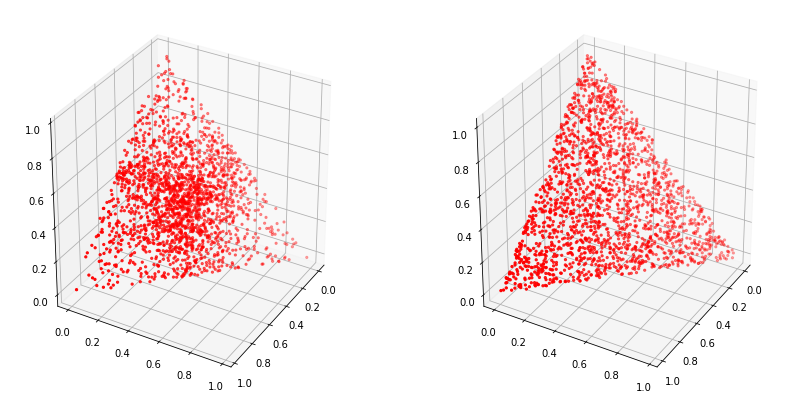

In [53]:
from mpl_toolkits.mplot3d import Axes3D

def sampling_weight(nx=3, nsp=10, flag=1):
    # uniform distributed samping with constrain: sum(x) = 1
    # nx: number of random variables
    # nsp: number of sampling points
    
    if flag==0:
        # Naive normalized method: NOT uniformly distributed on the simplex
        p = np.random.uniform(low=0, high=1, size=nx*nsp).reshape(nsp, nx)
        p = p / np.sum(p, axis=1).reshape(nsp,1)

    if flag==1:
        # Symmetric Dirichlet distribution: uniformly distributed on the simplex
        p = np.random.exponential(scale=1, size=nx*nsp).reshape(nsp, nx)
        p = p / np.sum(p, axis=1).reshape(nsp,1)
        
    return p 

plt.figure(1, figsize=(14,7))
for i in range(2):
    ax = plt.subplot(1,2,i+1, projection='3d')
    p = sampling_weight(nx=3, nsp=2000, flag=i)
    ax.scatter(p[:,0], p[:,1], p[:,2], c='r', s=20, marker='.')
    ax.view_init(30, 30)

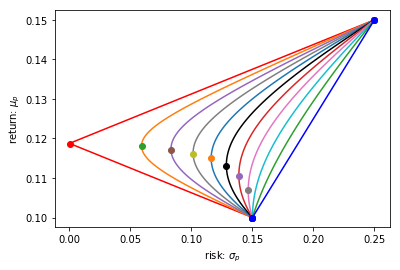

In [57]:
# cases of two assets

def plot_2s(r=[0.1, 0.15], s=[0.28, 0.24], cor=-0.1, cstr='r', lstr='-', 
            w=np.array([np.linspace(1,0,100), np.linspace(0,1,100)])):
    pr = np.dot(np.array(r).reshape([1,2]), w)[0]
    cormat = np.array([[s[0]*s[0], cor*s[0]*s[1]], [cor*s[0]*s[1], s[1]*s[1]]])
    ps = np.sqrt( np.sum(w * np.dot(cormat, w), axis=0) )
    plt.plot(s, r, cstr+'o')
    plt.plot(ps, pr, cstr+lstr)
    return pr, ps

plt.figure(1, figsize=(6,4))
cors = np.linspace(-1,1,11)
#cors = [0]
for cor in cors:
    cstr = ''
    if np.abs(cor+1) < 1e-6: cstr='r'
    if np.abs(cor-1) < 1e-6: cstr='b'
    if np.abs(cor-0) < 1e-6: cstr='k'
    pr, ps = plot_2s(r=[0.1, 0.15], s=[0.15, 0.25], cor=cor, cstr=cstr)
    imins = np.argmin(ps)
    plt.plot(ps[imins], pr[imins], cstr+'o')

plt.xlabel('risk: $\sigma_p$')
plt.ylabel('return: $\mu_p$')
plt.show()

Analytical MVP = [0.31596552 0.43908872 0.24494576]
Sample MVP = [0.30714531 0.42729323 0.26556146]


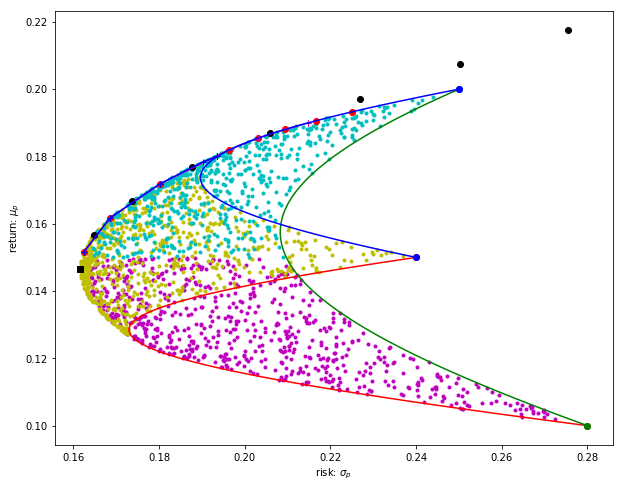

In [62]:
# Case of multiple assets
import quadprog

def quadprog_solve_qp(P, q, G=None, h=None, A=None, b=None):
    qp_G = .5 * (P + P.T)   # make sure P is symmetric
    qp_a = -q
    qp_C = -np.vstack([A, G]).T
    qp_b = -np.hstack([b, h])    
    meq = A.shape[0]
    # print(qp_G.shape, qp_a.shape, qp_C.shape, qp_b.shape)
    return quadprog.solve_qp(qp_G, qp_a, qp_C, qp_b, meq)[0]

def port_retrisk(r0, cov, w):
    n = cov.shape[0]
    r = r0.reshape([n, 1])
    pr = np.dot(r.T, w.T)[0]
    ps = np.sqrt( np.sum(w.T * np.dot(cov, w.T), axis=0)  )
    return pr, ps

def minvarport(cov):
    n = cov.shape[0]
    u = np.ones([n]).reshape([n,1])
    cinv = np.linalg.inv(cov)
    return np.dot(u.T, cinv) / np.dot(np.dot(u.T, cinv), u)

def effrontier(r0, cov, lam=np.linspace(0,1,11), flag=1, upb=1.0, lowb=0.0):
    n = cov.shape[0]
    r = r0.reshape([n, 1])
    efw = np.zeros([len(lam), n])  # weights
    efp = np.zeros([len(lam), 2])  # [return, std]
    u = np.ones([n]).reshape([n,1])

    # analytical solution
    if flag == 1:
        cinv = np.linalg.inv(cov)
        for i in range(len(lam)):
            zeta = (1 - lam[i]*np.dot(u.T, np.dot(cinv, r))[0]) / np.sum(cinv, axis=(0,1))
            efw[i,:] = lam[i]*np.dot(cinv, r).reshape([1,n]) + \
                zeta[0] * np.sum(cinv, axis=1).reshape([1,n])
        efp[:,0], efp[:,1] = port_retrisk(r, cov, efw)

    # use quadratic programming library
    if flag == 2:
        for i in range(len(lam)):
            efw[i,:] = quadprog_solve_qp(cov, -lam[i]*r[:,0], \
                G = np.append( np.identity(n), -np.identity(n), axis=0), \
                h = np.append( upb+np.zeros(n), -lowb+np.zeros(n) ), \
                A = u.T, b=1.0 )
        efp[:,0], efp[:,1] = port_retrisk(r, cov, efw)
    
    return efw, efp


r = np.array([0.1, 0.15, 0.2])
s = np.array([0.28, 0.24, 0.25])
cor = np.array([[1, -0.1, 0.25], 
                [-0.1, 1, 0.20], 
                [0.25, 0.20, 1]])
cov = cor * (np.dot(s.reshape([3,1]), s.reshape([3,1]).T))

plt.figure(figsize=(10,8))

# Monte-Carlo simulation
w = sampling_weight(nx=3, nsp=2000, flag=1)
pr, ps = port_retrisk(r, cov, w)
flag = np.argmax(w, axis=1)
cstr = list('myc')
for i in range(3):
    plt.plot(ps[flag==i], pr[flag==i], cstr[i]+'.')

# Minimum variance portfolio
wmvp = minvarport(cov)
print('Analytical MVP =', wmvp[0])
print('Sample MVP =', w[np.argmin(ps),:])
r_mvp, s_mvp = port_retrisk(r, cov, wmvp)
plt.plot( s_mvp, r_mvp, 'ks')

# Efficient frontier
lam = np.linspace(0, 0.7, 8)  # Lagrange multiplier
efw, efp = effrontier(r, cov, lam=lam, flag=1)
plt.plot( efp[:,1], efp[:,0], 'ko')

# Efficient frontier
lam = np.linspace(0, 0.7, 8) + 0.05  # Lagrange multiplier
efw, efp = effrontier(r, cov, lam=lam, flag=2, upb=1.0)
plt.plot( efp[:,1], efp[:,0], 'ro')
efw, efp = effrontier(r, cov, lam=lam, flag=2, upb=0.8)
plt.plot( efp[:,1], efp[:,0], 'm+-')
efw, efp = effrontier(r, cov, lam=lam, flag=2, upb=0.6)
plt.plot( efp[:,1], efp[:,0], 'b+-')


# Every Pair
i=0; j=1; pr, ps = plot_2s(r=[r[i], r[j]], s=[s[i], s[j]], cor=cor[i,j], cstr='r')
i=0; j=2; pr, ps = plot_2s(r=[r[i], r[j]], s=[s[i], s[j]], cor=cor[i,j], cstr='g')
i=1; j=2; pr, ps = plot_2s(r=[r[i], r[j]], s=[s[i], s[j]], cor=cor[i,j], cstr='b')

plt.xlabel('risk: $\sigma_p$')
plt.ylabel('return: $\mu_p$')
plt.show()

## Portfolio optimization with 30 Dow Jones stocks

In [9]:
import sys
sys.path.append('/disk2/yhy/Work/stock/smm/src/utils/')
from configure import *
from mod_dataprep import *

In [83]:
#dowjones = ['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP', 
#       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 
#       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT']

#dowjones = ['MMM', 'AXP', 'AAPL', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DWDP', 
#       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 
#       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'V', 'WMT']

syms = ['ABT', 'ABBV', 'ACN', 'ACE', 'ADBE', 'ADT', 'AAP', 'AES', 'AET', 'AFL', 'AMG', 
        'A', 'GAS', 'APD', 'ARG', 'AKAM', 'AA', 'AGN', 'ALXN', 'ALLE', 'ADS', 'ALL', 
        'ALTR', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AMP', 'ABC', 
        'AME', 'AMGN', 'APH', 'APC', 'ADI', 'AON', 'APA', 'AIV', 'AMAT', 'ADM', 'AIZ', 
        'T', 'ADSK', 'ADP', 'AN', 'AZO', 'AVGO', 'AVB', 'AVY', 'BHI', 'BLL', 'BAC', 
        'BK', 'BCR', 'BXLT', 'BAX', 'BBT', 'BDX', 'BBBY', 'BRK-B', 'BBY', 'BLX', 
        'HRB', 'BA', 'BWA', 'BXP', 'BSK', 'BMY', 'BRCM', 'BF-B', 'CHRW', 'CA', 'CVC', 
        'COG', 'CAM', 'CPB', 'COF', 'CAH', 'HSIC', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 
        'CELG', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHK', 'CVX', 'CMG', 'CB', 'CI', 
        'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 
        'CCE', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CSC', 'CAG', 'COP', 'CNX', 'ED', 'STZ', 
        'GLW', 'COST', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 
        'DLPH', 'DAL', 'XRAY', 'DVN', 'DO', 'DTV', 'DFS', 'DISCA', 'DISCK', 'DG', 'DLTR', 
        'D', 'DOV', 'DOW', 'DPS', 'DTE', 'DD', 'DUK', 'DNB', 'ETFC', 'EMN', 'ETN', 
        'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMC', 'EMR', 'ENDP', 'ESV', 'ETR', 'EOG', 
        'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 
        'XOM', 'FFIV', 'FB', 'FAST', 'FDX', 'FIS', 'FITB', 'FSLR', 'FE', 'FSIV', 'FLIR', 
        'FLS', 'FLR', 'FMC', 'FTI', 'F', 'FOSL', 'BEN', 'FCX', 'FTR', 'GME', 'GPS', 
        'GRMN', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GNW', 'GILD', 'GS', 'GT', 'GOOGL', 
        'GOOG', 'GWW', 'HAL', 'HBI', 'HOG', 'HAR', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 
        'HCN', 'HP', 'HES', 'HPQ', 'HD', 'HON', 'HRL', 'HSP', 'HST', 'HCBK', 'HUM', 
        'HBAN', 'ITW', 'IR', 'INTC', 'ICE', 'IBM', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 
        'IVZ', 'IRM', 'JEC', 'JBHT', 'JNJ', 'JCI', 'JOY', 'JPM', 'JNPR', 'KSU', 'K', 
        'KEY', 'GMCR', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KRFT', 'KR', 'LB', 'LLL', 
        'LH', 'LRCX', 'LM', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LLTC', 'LMT', 
        'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MNK', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 
        'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MHFI', 'MCK', 'MJN', 'MMV', 'MDT', 'MRK', 
        'MET', 'KORS', 'MCHP', 'MU', 'MSFT', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 
        'MS', 'MOS', 'MSI', 'MUR', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 
        'NFX', 'NEM', 'NWSA', 'NEE', 'NLSN', 'NKE', 'NI', 'NE', 'NBL', 'JWN', 'NSC', 
        'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'OI', 
        'PCAR', 'PLL', 'PH', 'PDCO', 'PAYX', 'PNR', 'PBCT', 'POM', 'PEP', 'PKI', 'PRGO', 
        'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PBI', 'PCL', 'PNC', 'RL', 'PPG', 
        'PPL', 'PX', 'PCP', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 
        'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RTN', 'O', 'RHT', 'REGN', 
        'RF', 'RSG', 'RAI', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RLC', 'R', 'CRM', 
        'SNDK', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIAL', 'SPG', 
        'SWKS', 'SLG', 'SJM', 'SNA', 'SO', 'LUV', 'SWN', 'SE', 'STJ', 'SWK', 'SPLS', 
        'SBUX', 'HOT', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYY', 'TROW', 'TGT', 
        'TEL', 'TE', 'TGNA', 'THC', 'TDC', 'TSO', 'TXN', 'TXT', 'HSY', 'TRV', 'TMO', 
        'TIF', 'TWX', 'TWC', 'TJK', 'TMK', 'TSS', 'TSCO', 'RIG', 'TRIP', 'FOXA', 
        'TSN', 'TYC', 'UA', 'UNP', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'URBN', 
        'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 
        'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'ANTM', 'WFC', 'WDC', 'WU', 'WY', 'WHR', 
        'WFM', 'WMB', 'WEC', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 
        'YUM', 'ZBH', 'ZION', 'ZTS' ]

getinfo_mulquote(syms)

ABT, ABBV, ACN, ERROR: ACE does not exsit!
ACE, ADBE, ADT, AAP, AES, AET, AFL, AMG, A, ERROR: GAS does not exsit!
GAS, APD, ERROR: ARG does not exsit!
ARG, AKAM, AA, AGN, ALXN, ALLE, ADS, ALL, ALTR, MO, AMZN, AEE, AAL, AEP, AXP, AIG, AMT, AMP, ABC, AME, AMGN, APH, APC, ADI, AON, APA, AIV, AMAT, ADM, AIZ, T, ADSK, ADP, AN, AZO, AVGO, AVB, AVY, ERROR: BHI does not exsit!
BHI, BLL, BAC, BK, ERROR: BCR does not exsit!
BCR, ERROR: BXLT does not exsit!
BXLT, BAX, BBT, BDX, BBBY, ERROR: BRK-B does not exsit!
BRK-B, BBY, BLX, HRB, BA, BWA, BXP, ERROR: BSK does not exsit!
BSK, BMY, ERROR: BRCM does not exsit!
BRCM, ERROR: BF-B does not exsit!
BF-B, CHRW, CA, ERROR: CVC does not exsit!
CVC, COG, ERROR: CAM does not exsit!
CAM, CPB, COF, CAH, HSIC, KMX, CCL, CAT, CBG, CBS, CELG, CNP, CTL, CERN, CF, SCHW, CHK, CVX, CMG, CB, CI, XEC, CINF, CTAS, CSCO, C, CTXS, CLX, CME, CMS, ERROR: COH does not exsit!
COH, KO, CCE, CTSH, CL, CMCSA, CMA, ERROR: CSC does not exsit!
CSC, CAG, COP, CNX, ED, STZ, GLW, C

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date
0,NYSE,ABT,Abbott Laboratories,1,57.64,$100.33B,NaN,Health Care,Major Pharmaceuticals,1980-03-17,2018-05-11
0,NYSE,ABBV,AbbVie Inc.,1,111.86,$178.58B,2012.0,Health Care,Major Pharmaceuticals,2013-01-02,2018-05-11
0,NYSE,ACN,Accenture plc,1,156.84,$99.84B,2001.0,Miscellaneous,Business Services,2001-07-19,2018-05-11
0,NASDAQ,ADBE,Adobe Systems Incorporated,1,193.48,$95.11B,1986.0,Technology,Computer Software: Prepackaged Software,1986-08-13,2018-05-11
0,NYSE,ADT,ADT Inc.,1,12.15,$9.1B,2018.0,Consumer Services,Diversified Commercial Services,2018-01-19,2018-05-11
0,NYSE,AAP,Advance Auto Parts Inc,1,106.22,$7.85B,NaN,Consumer Services,Other Specialty Stores,2001-11-29,2018-05-11
0,NYSE,AES,The AES Corporation,1,10.32,$6.82B,NaN,Basic Industries,Electric Utilities: Central,1991-06-26,2018-05-11
0,NYSE,AET,Aetna Inc.,1,178.52,$58.23B,NaN,Health Care,Medical Specialities,1977-01-03,2018-05-11
0,NYSE,AFL,Aflac Incorporated,1,86.07,$33.61B,NaN,Finance,Accident &Health Insurance,1980-03-17,2018-05-11
0,NYSE,AMG,"Affiliated Managers Group, Inc.",1,181.93,$10.11B,NaN,Finance,Investment Managers,1997-11-21,2018-05-11


In [43]:
# selete stocks from given time period
def select_timeperiod(quotes, time=['2018-01-01', '2018-03-31']):
    tmp = {}
    for sym in quotes.keys():
        quote = add_datetime(quotes[sym])
        quote.index = quote['datetime']
        tmp[sym] = quote.loc[time[0]:time[1], 'Adj Close']
    return pd.DataFrame(tmp)

quotes = getmulquote(dowjones)
ss = select_timeperiod(quotes)

for sym in ss.columns.values.tolist():
    print(sym, len(ss[sym]), sum(np.isnan(np.array( ss.loc[:, sym] ) )), end=', ')
    

AAPL 61 0, AXP 61 0, CAT 61 0, CSCO 61 0, CVX 61 0, DIS 61 0, DWDP 61 0, GE 61 0, GS 61 0, HD 61 0, IBM 61 0, INTC 61 0, JNJ 61 0, JPM 61 0, KO 61 0, MCD 61 0, MMM 61 0, MRK 61 0, MSFT 61 0, NKE 61 0, PFE 61 0, PG 61 0, TRV 61 0, UNH 61 0, UTX 61 0, V 61 0, VZ 61 0, WMT 61 0, XOM 61 0, 

In [84]:
quotes = getmulquote(syms)

ERROR: ACE does not exsit!
ERROR: GAS does not exsit!
ERROR: ARG does not exsit!
ERROR: BHI does not exsit!
ERROR: BCR does not exsit!
ERROR: BXLT does not exsit!
ERROR: BRK-B does not exsit!
ERROR: BSK does not exsit!
ERROR: BRCM does not exsit!
ERROR: BF-B does not exsit!
ERROR: CVC does not exsit!
ERROR: CAM does not exsit!
ERROR: COH does not exsit!
ERROR: CSC does not exsit!
ERROR: DOW does not exsit!
ERROR: DD does not exsit!
ERROR: EMC does not exsit!
ERROR: FSIV does not exsit!
ERROR: HAR does not exsit!
ERROR: HSP does not exsit!
ERROR: HCBK does not exsit!
ERROR: JOY does not exsit!
ERROR: GMCR does not exsit!
ERROR: KRFT does not exsit!
ERROR: LVLT does not exsit!
ERROR: LLTC does not exsit!
ERROR: MHFI does not exsit!
ERROR: MJN does not exsit!
ERROR: PLL does not exsit!
ERROR: POM does not exsit!
ERROR: PCL does not exsit!
ERROR: PCP does not exsit!
ERROR: RAI does not exsit!
ERROR: RLC does not exsit!
ERROR: SNDK does not exsit!
ERROR: SIAL does not exsit!
ERROR: STJ does

In [105]:
syms = []
for sym in quotes.keys():
    if quotes[sym] is not None:
        syms.append(sym)
print(len(syms), len(quotes.keys()) )

# selete stocks from given time period
def select_timeperiod_syms(quotes, syms, time=['2018-01-01', '2018-03-31']):
    tmp = {}
    for sym in syms:
        quote = add_datetime(quotes[sym])
        quote.index = quote['datetime']
        tmp[sym] = quote.loc[time[0]:time[1], 'Adj Close']
    return pd.DataFrame(tmp)

ss = select_timeperiod_syms(quotes, syms)

for sym in syms:
    print(sym, len(ss[sym]), sum(np.isnan(np.array( ss.loc[:, sym] ) )), end=', ')
    

451 497
ABT 61 0, ABBV 61 0, ACN 61 0, ADBE 61 0, ADT 61 12, AAP 61 0, AES 61 0, AET 61 0, AFL 61 0, AMG 61 0, A 61 0, APD 61 0, AKAM 61 0, AA 61 0, AGN 61 0, ALXN 61 0, ALLE 61 0, ADS 61 0, ALL 61 0, ALTR 61 0, MO 61 0, AMZN 61 0, AEE 61 61, AAL 61 0, AEP 61 0, AXP 61 0, AIG 61 0, AMT 61 0, AMP 61 61, ABC 61 0, AME 61 0, AMGN 61 0, APH 61 0, APC 61 0, ADI 61 0, AON 61 0, APA 61 0, AIV 61 0, AMAT 61 0, ADM 61 0, AIZ 61 0, T 61 0, ADSK 61 0, ADP 61 0, AN 61 0, AZO 61 0, AVGO 61 0, AVB 61 0, AVY 61 0, BLL 61 0, BAC 61 0, BK 61 0, BAX 61 0, BBT 61 0, BDX 61 0, BBBY 61 0, BBY 61 0, BLX 61 0, HRB 61 0, BA 61 0, BWA 61 0, BXP 61 0, BMY 61 0, CHRW 61 0, CA 61 0, COG 61 0, CPB 61 0, COF 61 0, CAH 61 0, HSIC 61 0, KMX 61 0, CCL 61 0, CAT 61 0, CBG 61 60, CBS 61 0, CELG 61 0, CNP 61 0, CTL 61 0, CERN 61 0, CF 61 0, SCHW 61 0, CHK 61 61, CVX 61 0, CMG 61 0, CB 61 0, CI 61 0, XEC 61 0, CINF 61 0, CTAS 61 0, CSCO 61 0, C 61 0, CTXS 61 0, CLX 61 0, CME 61 0, CMS 61 0, KO 61 0, CCE 61 0, CTSH 61 0, C

In [106]:
syms_nomiss = []
syms_drop = []

ss.head(5)
for sym in syms:
    #print(sym, len(ss[sym]), sum(np.isnan(np.array( ss.loc[:, sym] ) )) )
    if sum(np.isnan(np.array( ss.loc[:, sym] ) )) == 0:
        syms_nomiss.append(sym)
    else:
        if sym in ss.columns.tolist():
            syms_drop.append(sym)

print(len(syms_nomiss))

ss = ss.drop(syms_drop, axis=1)
print(np.array(ss).shape)


437
(61, 437)


In [107]:
ss

,A,AA,AAL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XEL,XL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZION,ZTS
datetime,,,,,,,,,,,,,,,,,,,,,
2018-01-02,67.449440,55.169998,52.764896,106.034760,96.707397,93.673859,58.229904,152.494339,177.699997,89.812729,...,47.392445,33.885387,67.525246,83.324730,67.022575,67.873566,81.223717,123.785530,50.504852,71.547188
2018-01-03,69.165611,54.500000,52.117657,106.994270,98.220757,94.022499,58.358658,153.198135,181.039993,90.926933,...,47.075241,34.293766,68.878136,84.961235,66.792976,68.701172,81.154045,124.643623,50.445080,71.876160
2018-01-04,68.646774,54.700001,52.446255,110.942207,97.660614,93.813316,58.259617,155.012131,183.220001,90.827454,...,46.708469,35.100563,70.121605,85.078827,66.782997,69.159843,81.980217,124.464020,50.654274,72.304832
2018-01-05,69.744324,54.090000,52.426342,112.121597,99.360687,94.948875,58.427994,156.290848,185.339996,91.195534,...,46.381355,34.512897,73.762482,85.010231,67.721344,69.030220,82.458000,125.701286,50.674194,73.132256
2018-01-08,69.893990,55.000000,51.908550,111.332008,97.768707,96.522728,58.259617,157.539810,185.039993,91.354713,...,46.728294,34.323647,74.249916,85.392418,68.180550,69.279495,82.597359,125.940750,50.425159,74.009521
2018-01-09,71.610153,54.200001,51.858765,110.432472,98.505737,97.140312,58.358658,158.065201,186.699997,91.165695,...,46.183102,34.074635,74.448868,85.029831,65.335526,69.299438,82.378372,123.915245,51.610580,74.876823
2018-01-10,70.632339,56.169998,53.551537,110.532417,97.965263,96.831520,58.269520,157.510086,187.110001,89.643616,...,45.727119,34.094555,73.712738,84.353676,62.650234,68.800880,82.169342,122.258911,52.148499,73.680550
2018-01-11,70.642319,56.910000,56.180321,112.891190,98.252281,97.757896,58.667606,157.718246,188.919998,90.718025,...,45.122444,35.130444,73.951485,85.186630,64.137627,69.768082,82.109619,122.019447,52.905575,74.358437
2018-01-12,71.570244,56.759998,58.221615,115.879639,99.311310,98.614548,58.558132,158.709503,195.050003,91.543724,...,44.755676,35.349571,74.269814,85.764793,65.674934,70.256668,83.234413,121.829865,53.074921,75.155952


In [120]:
# calculate mean and corvariance matrix of logreturn
def cal_RR(quotes, unbiased=False):
    logr = np.log(np.array(quotes)[1:,:]) - np.log(np.array(quotes)[0:-1,:])
    ntime = logr.shape[0]; ns = logr.shape[1]
    mu = np.mean(logr, axis=0)
    if unbiased: 
        sigma = np.dot((logr-mu.reshape([1, ns])).T, logr-mu.reshape([1, ns]))/(ntime-2)
        for i in range(ns):
            sigma[i,i] = sigma[i,i] * (ntime-2)/(ntime-1)
    else:
        sigma = np.dot((logr-mu.reshape([1, ns])).T, logr-mu.reshape([1, ns]))/ntime
    return list(quotes.columns), mu, sigma

syms, mu, sigma = cal_RR(ss, unbiased=False)
print( np.linalg.det(sigma) )

print(syms)

0.0
['A', 'AA', 'AAL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AKAM', 'ALL', 'ALLE', 'ALTR', 'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMT', 'AMZN', 'AN', 'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'AVB', 'AVGO', 'AVY', 'AXP', 'AZO', 'BA', 'BAC', 'BAX', 'BBBY', 'BBT', 'BBY', 'BDX', 'BEN', 'BK', 'BLL', 'BLX', 'BMY', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBS', 'CCE', 'CCI', 'CCL', 'CELG', 'CERN', 'CF', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNP', 'CNX', 'COF', 'COG', 'COL', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DAL', 'DE', 'DFS', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DLPH', 'DLTR', 'DNB', 'DO', 'DOV', 'DPS', 'DRI', 'DTE', 'DTV', 'DUK', 'DVA', 'DVN', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'ENDP', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ESRX', 'ESS', 'ESV', 'ETFC', '

Text(0,0.5,'log return')

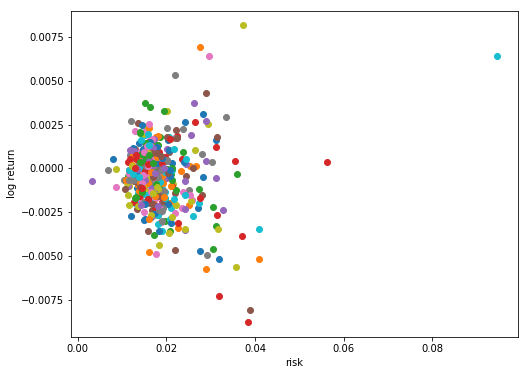

In [113]:
plt.figure(figsize=(8,6))
for i in range(len(syms)):
    plt.plot(np.sqrt(sigma[i,i]), mu[i], 'o')
    #plt.text(np.sqrt(sigma[i,i]), mu[i], syms[i])

plt.xlabel('risk')
plt.ylabel('log return')

0.0


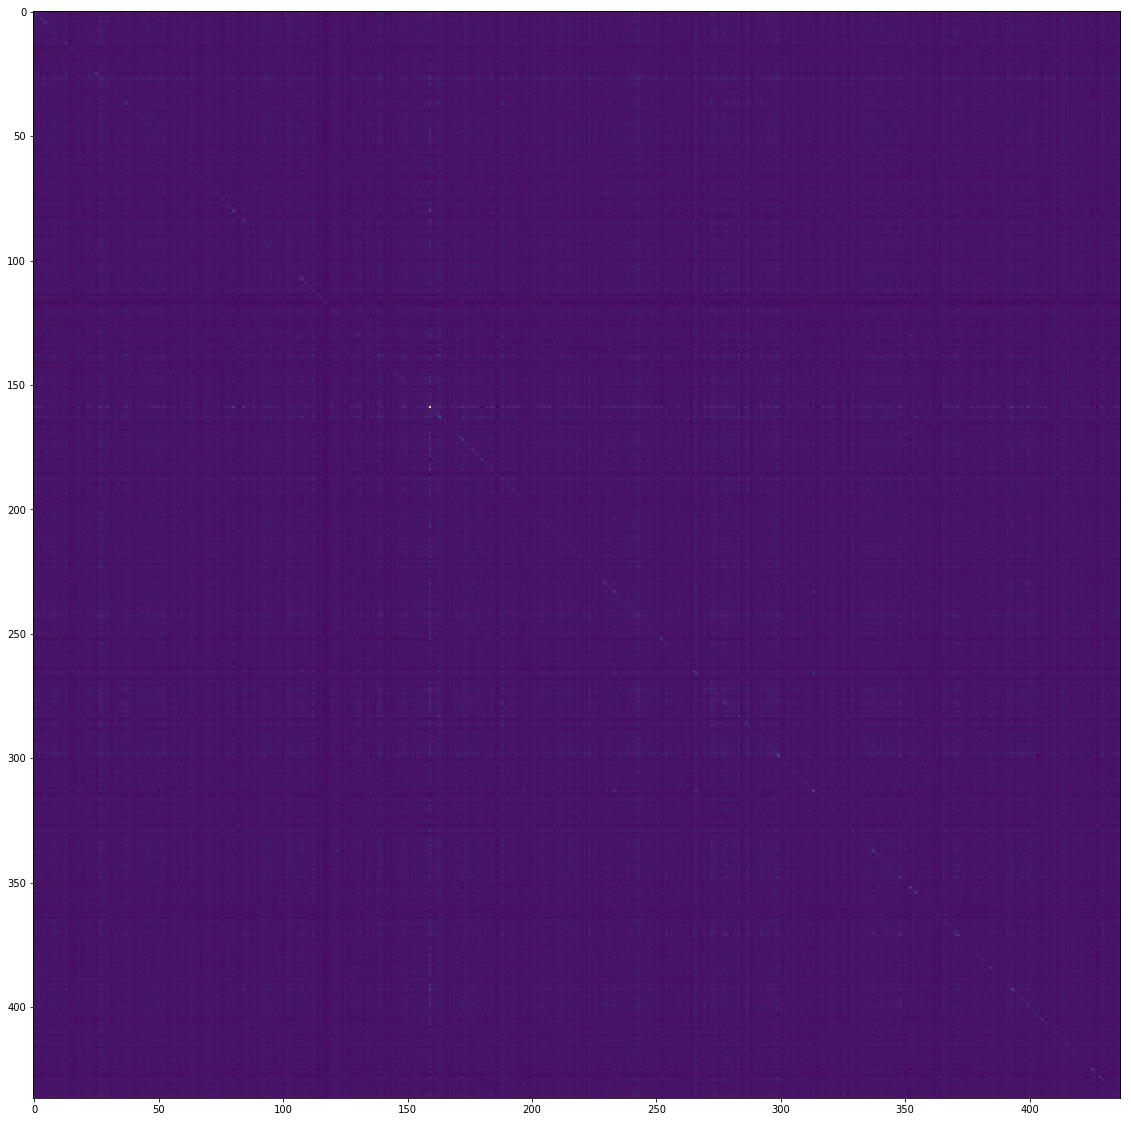

In [125]:
plt.figure(1, figsize=(20, 20))
plt.imshow(sigma, interpolation=None)

for i in range(len(syms)):
    sigma[i,i] += 1e-8
    
print( np.linalg.det(sigma) )

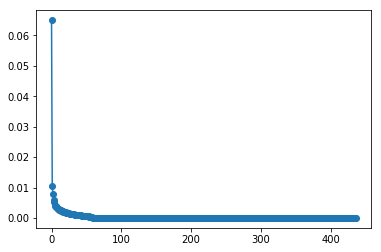

In [126]:
U, S, V = np.linalg.svd(sigma)
plt.plot(S, '-o')

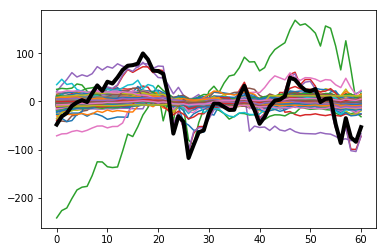

In [127]:
pc1 = np.sum( U[:,0] * np.array(ss), axis=1)
#for i in range(len(syms)):
#    print(syms[i], U[i,0])

#for sym in ss.columns.values.tolist():
a = np.array(ss)
adm = a - np.mean(a, axis=0)

for i in range(a.shape[1]):
    plt.plot( adm[:,i], alpha=1 )
#plt.legend(syms)

plt.plot(- pc1 + np.mean(pc1), 'k', lw=4)

plt.show()

#print(adm[0,:])

Analytical MVP = [-7.07945493e-03  2.35112054e-02  5.54998768e-03  7.92266589e-04
 -8.77835225e-04 -7.13709158e-03 -3.75741806e-03 -4.51448304e-03
  5.54149752e-03 -4.86470026e-03  6.38059256e-03 -7.54206569e-03
  1.35389350e-02 -8.09483471e-03  1.01552369e-02  3.30823396e-03
  2.64292296e-02  1.90494350e-02 -1.79233677e-03  1.16915397e-02
  2.15862691e-03 -1.07901307e-03  1.73521843e-03  4.95160997e-03
  8.64807388e-03  3.03070062e-02 -1.10391550e-03 -1.57019361e-02
  4.88834097e-03 -1.47199250e-02 -6.93248810e-03 -3.12813085e-04
  1.61983629e-02 -1.60731841e-02  6.39123510e-03  1.33574946e-02
 -1.34943507e-02 -1.30620387e-04 -2.93756344e-03  3.82487669e-03
  7.32154148e-04  1.22732540e-02  2.72471525e-03  4.54249181e-05
  1.56798699e-02 -9.12560442e-03 -3.68449681e-03  1.49928888e-03
  5.84071559e-03  1.51452252e-03 -5.69072765e-03 -6.35268113e-03
 -9.14873894e-03  1.27234046e-02  1.25657346e-02  4.17498199e-03
  7.32446950e-03 -8.24646830e-03 -3.68091911e-03  1.65605230e-03
  3.4095

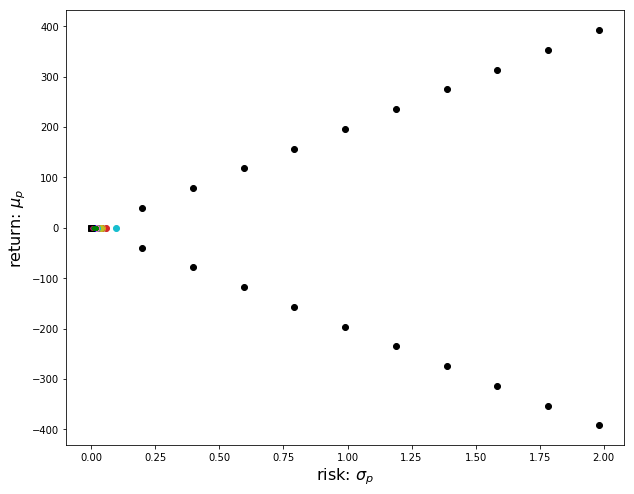

In [128]:
plt.figure(figsize=(10,8))
for i in range(len(syms)):
    plt.plot(np.sqrt(sigma[i,i]), mu[i], 'o')
    #plt.text(np.sqrt(sigma[i,i]), mu[i], syms[i])

# Monte-Carlo simulation
w = sampling_weight(nx=len(syms), nsp=20000, flag=1)
pr, ps = port_retrisk(mu, sigma, w)
plt.plot(ps, pr, 'b+', alpha=0.1)

# Minimum variance portfolio
wmvp = minvarport(sigma)
print('Analytical MVP =', wmvp[0])
print('Sample MVP =', w[np.argmin(ps),:])
r_mvp, s_mvp = port_retrisk(mu, sigma, wmvp)
plt.plot( s_mvp, r_mvp, 'ks')
print(s_mvp, r_mvp)

# Efficient frontier: analytic solution
lam = np.linspace(-0.01, 0.01, 21)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=1)
plt.plot( efp[:,1], efp[:,0], 'ko')

# Efficient frontier: quadratic optimization
lam = np.linspace(0, 0.1, 21)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=1.0, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'r.-')
lam = np.linspace(0, 0.2, 21)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=0.2, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'm.-')
lam = np.linspace(0, 0.4, 41)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=0.1, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'g.-')

plt.xlabel('risk: $\sigma_p$', fontsize=16)
plt.ylabel('return: $\mu_p$', fontsize=16)
plt.show()

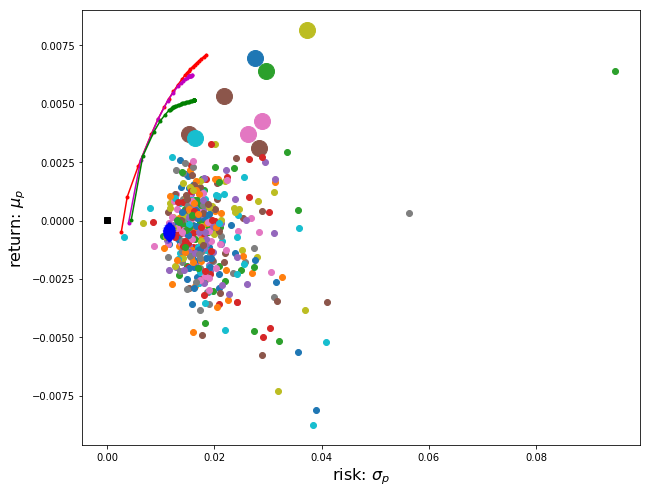

In [144]:
plt.figure(figsize=(10,8))
for i in range(len(syms)):
    plt.plot(np.sqrt(sigma[i,i]), mu[i], 'o')
    if syms[i] in top10:
        plt.plot(np.sqrt(sigma[i,i]), mu[i], 'o', markersize=16)
        
    #plt.text(np.sqrt(sigma[i,i]), mu[i], syms[i])

# Monte-Carlo simulation
w = sampling_weight(nx=len(syms), nsp=20000, flag=1)
pr, ps = port_retrisk(mu, sigma, w)
plt.plot(ps, pr, 'b+', alpha=0.1)

# Minimum variance portfolio
wmvp = minvarport(sigma)
#print('Analytical MVP =', wmvp[0])
#print('Sample MVP =', w[np.argmin(ps),:])
r_mvp, s_mvp = port_retrisk(mu, sigma, wmvp)
plt.plot( s_mvp, r_mvp, 'ks')
#print(s_mvp, r_mvp)

# Efficient frontier: analytic solution
#lam = np.linspace(-0.01, 0.01, 21)  # Lagrange multiplier
#efw, efp = effrontier(mu, sigma, lam=lam, flag=1)
#plt.plot( efp[:,1], efp[:,0], 'ko')

# Efficient frontier: quadratic optimization
lam = np.linspace(0, 0.1, 21)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=1.0, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'r.-')
lam = np.linspace(0, 0.2, 21)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=0.2, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'm.-')
lam = np.linspace(0, 0.4, 41)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=0.1, lowb=0.0)
plt.plot( efp[:,1], efp[:,0], 'g.-')

plt.xlabel('risk: $\sigma_p$', fontsize=16)
plt.ylabel('return: $\mu_p$', fontsize=16)
plt.show()

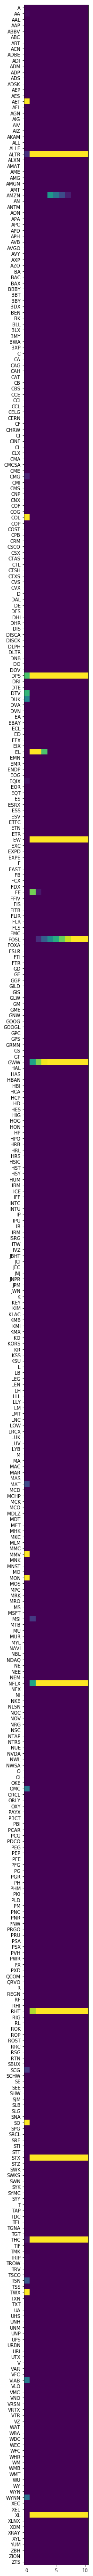

In [137]:
lam = np.linspace(0, 0.4, 11)  # Lagrange multiplier
efw, efp = effrontier(mu, sigma, lam=lam, flag=2, upb=0.1, lowb=0.0)
plt.figure(1, figsize=(3, 100))
plt.imshow(efw.T, interpolation = None )
plt.yticks(range(len(syms)), syms)
#plt.colorbar()
plt.show()


In [142]:

top10 = ['ALTR', 'DPS', 'EW', 'FOXA', 'GWW', 'NFLX', 'RHT', 'STX', 'THC', 'XL']
getinfo_mulquote(top10)


ALTR, DPS, EW, FOXA, GWW, NFLX, RHT, STX, THC, XL, 

,Exchange,Symbol,Name,Exist,LastSale,MarketCap,IPOyear,Sector,industry,Start_date,End_date
0,NASDAQ,ALTR,Altair Engineering Inc.,1,25.72,$1.62B,2017.0,Technology,Computer Software: Prepackaged Software,2017-10-26,2018-05-11
0,NYSE,DPS,"Dr Pepper Snapple Group, Inc",1,115.95,$20.84B,NaN,Consumer Non-Durables,Beverages (Production/Distribution),2008-05-07,2018-05-11
0,NYSE,EW,Edwards Lifesciences Corporation,1,127.35,$26.95B,NaN,Health Care,Industrial Specialties,2000-03-27,2018-05-11
0,NASDAQ,FOXA,"Twenty-First Century Fox, Inc.",1,36.58,$44.66B,NaN,Consumer Services,Television Services,1994-11-03,2018-05-11
0,NYSE,GWW,"W.W. Grainger, Inc.",1,271.37,$15.29B,NaN,Consumer Services,Office Equipment/Supplies/Services,1980-03-17,2018-05-11
0,NASDAQ,NFLX,"Netflix, Inc.",1,258.27,$112.08B,2002.0,Consumer Services,Consumer Electronics/Video Chains,2002-05-23,2018-05-11
0,NYSE,RHT,"Red Hat, Inc.",1,132.03,$23.37B,NaN,Technology,"Computer Software: Programming, Data Processing",1999-08-11,2018-05-11
0,NASDAQ,STX,Seagate Technology PLC,1,49.63,$14.14B,2002.0,Technology,Electronic Components,2002-12-11,2018-05-11
0,NYSE,THC,Tenet Healthcare Corporation,1,18.49,$1.87B,NaN,Health Care,Hospital/Nursing Management,1982-01-04,2018-05-11
0,NYSE,XL,XL Group Ltd.,1,41.90,$10.73B,NaN,Finance,Property-Casualty Insurers,1991-07-19,2018-05-11


In [143]:
ss[top10]

,ALTR,DPS,EW,FOXA,GWW,NFLX,RHT,STX,THC,XL
datetime,,,,,,,,,,
2018-01-02,24.270000,94.803146,111.580002,35.690048,233.480637,201.070007,121.040001,42.482220,15.990000,33.885387
2018-01-03,25.049999,94.852905,114.589996,36.366825,232.014618,205.050003,123.059998,42.403053,15.560000,34.293766
2018-01-04,24.920000,95.300697,115.410004,36.645496,233.827316,205.630005,123.980003,42.195244,15.360000,35.100563
2018-01-05,25.000000,95.032021,115.860001,36.575829,235.996613,209.990005,124.139999,42.492115,15.440000,34.512897
2018-01-08,25.410000,95.211143,118.139999,36.068249,235.996613,212.050003,125.209999,45.520199,14.950000,34.323647
2018-01-09,26.600000,95.051926,119.510002,36.366825,235.045685,209.309998,124.150002,45.906132,15.110000,34.074635
2018-01-10,27.990000,95.201187,118.500000,35.431278,229.558090,212.520004,124.510002,46.579037,14.770000,34.094555
2018-01-11,26.450001,95.171333,119.989998,36.028435,235.471619,217.240005,126.160004,48.498802,15.430000,35.130444
2018-01-12,25.879999,94.773293,120.830002,36.555923,233.441010,221.229996,125.949997,50.725334,16.250000,35.349571
